# Health Information Systems and Decision Support Systems
## WPO 4: Data-driven systems 2: regression  (18/03/22)
***
*Jakub Ceranka, Joris Wuts, Jef Vandemeulebroucke* <br>
*Department of Electronics and Informatics (ETRO)* <br>
*Vrije Universiteit Brussel, Pleinlaan 2, B-1050 Brussels, Belgium*

<font color=red>
Aneruth Mohansundaram - 0573520 (VUB) <br><br>
Ishan Raychaudhuri - 0574056 (VUB)
</font>

***
### Goal
The goal of this practical session is to get an insight into logistic regression modelling using real life medical data from patients infected with COVID-19. Your tasks will involve building different models to predict disease severity and analyze the relations between different variables and severity risk. Students must send their notebook using the Assignment functionality of Canvas before the __25th of March, 2022, 23:59. Remember to include the HTML format!__ The grade from this practical session will contribute to your final grade.
Questions: [jceranka@etrovub.be](mailto:jceranka@etrovub.be), [jwuts@etrovub.be](mailto:jwuts@etrovub.be) 
***
In this practical session you will predict the severity of the COVID-19 outcome, based on the analysis of patient information and the corresponding computed tomography (CT) images features of COVID-19 suspects and actual patients.
***
#### COVID features dataset
Have a look at the provided COVID datasheet (*COVID_data.csv*) with multiple features describing various COVID patients and suspects. The dataset consist of 2000 data points with multiple features, each datapoint representing an actual COVID-patient or a COVID-suspect.

The contents of the feaures provide the following information:
*   *PatientID*: ID of the patient
*   *Age*: Age of the patient categorized into one of 6 categories to limit the risk of deanonimization.
*   *Sex*: M or F - patient gender
*   *Covid*: indicates whether the patient had a confirmed COVID infection
*   *Severity*: for COVID patients, indicates whether the disease was severe (need for intubation or caused patient death)
*   *Image_size* and *Spacing* are CT image parameters used for imaging
*   *GGO*: Proportion of the lung with GGO. Ground glass opacity (*GGO*) refers to the hazy gray areas that can show up in CT scans or X-rays of the lungs. These gray areas indicate increased density inside the lungs. The term comes from a technique in glassmaking during which the surface of the glass is blasted by sand.
*   *Consolidation*: Proportion of the lung with consolidated lessions. A pulmonary consolidation is a region of normally compressible lung tissue that has filled with liquid instead of air. 

Two last features (*GGO* and *Consolidation*) were extracted from CT images of patients with COVID, or suspects of having COVID, and the ratio to the total lung volume is provided.

<img src="GGO.jpeg" alt="Drawing" style="width: 600px;"/>

High-resolution CT image showing ground-glass opacities in the periphery of both lungs in a patient with COVID-19 (red arrows). The adjacent normal lung tissue with lower attenuation appears as darker areas.


### Importing packages 

During this lab session you will need a couple of packages, run the following cell to import pandas, numpy, seaborn and matplotlib.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

***
## Part 1: Loading, cleaning and analyzing the data
### Task 1.1 Loading and cleaning the data 
Lets read the data into the dataframe `data`. 

Inspect the dataframe and drop the following columns : `Images_sizes, Spacings, PatientID`.

Your processed dataframe should have a shape of `(2000,6)`.

Please call your final dataframe `df` throughout the whole lab session, as we provide code snipets in Task 2 and 3 that assume this variable name for the dataframe.

To further use the dataframe, we need to binarize the `Sex` label. Binarize the column so that male patients have a value of 1 and females of 0. Finally, filter the dataframe so it only has COVID positive patients. After filtering you can also drop the COVID column. 

Your final dataframe should be a shape of `(1205, 5)`. 

In [34]:
data = pd.read_csv('COVID_data.csv')
colsRemove = ['PatientID','Image_size_x','Image_size_y','Image_size_z','Spacing_x','Spacing_y','Spacing_z']
df = data.drop(colsRemove,axis=1)
df.Sex = df.Sex.replace({'M':0,'F':1})
df.head()

,Age,Sex,Covid,Severity,GGO,Consolidation
0,65,0,1,0,0.097123,0.049944
1,35,1,0,0,0.084260,0.009885
2,65,0,0,0,0.187388,0.011108
3,85,0,0,0,0.102844,0.017063
4,65,1,0,0,0.001064,0.001452


In [35]:
df = df[df['Covid']==1]
df = df.drop('Covid',axis=1)

In [36]:
df.head()

,Age,Sex,Severity,GGO,Consolidation
0,65,0,0,0.097123,0.049944
5,65,1,0,0.001831,0.002305
7,65,1,0,0.107670,0.020860
9,65,0,0,0.082823,0.000371
10,35,0,0,0.036793,0.054030


***
### Task 1.2: Assess the severity of COVID-19 in function of age

Plot a stacked histogram for the different age groups. Note, that the ages are categorical at 6 fixed values.

__Hint:__ Use seaborns `histplot`. 

In [37]:
df.Age.unique()

array([65, 35, 85, 75, 45, 55])

<AxesSubplot:xlabel='GGO', ylabel='Count'>

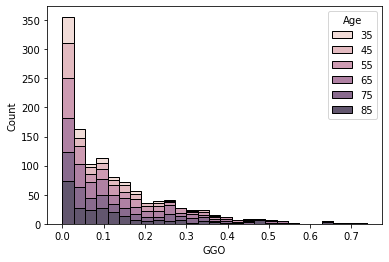

In [41]:
sns.histplot(df, x="GGO", hue="Age", multiple="stack")

The `histplot` only gives us insight for the discrete ages that are present in the dataset. To get a better understanding for age values in between, use a density plot. Plot both distributions (severe and not severe) in function of age on top of each other.

__Hint:__ Use the KDE seaborn plots and set alpha to a low value to plot densities over each other.

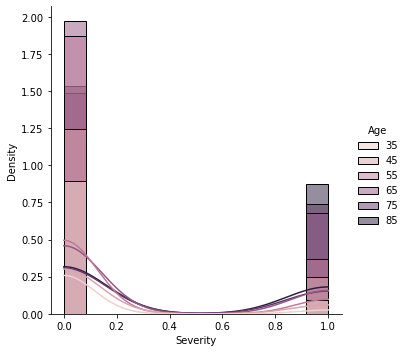

In [45]:
sns.displot(df, x="Severity", hue="Age",kde=True,stat="density")

### Question 1.1: What can you conclude from these plots?

Answer to question 1.1: ...

***
### Task 1.3: Checking the impact of GGO, consolidation and sex on the COVID severity

Now make similar three plots to assess the correlations between the `GGO`, `Consolidation` and `Sex` vs `Severity`.

__Hint:__ As `sex` is a discrete binary value, a normal histogram is more suited then the KDE plot.

<AxesSubplot:xlabel='GGO', ylabel='Severity'>

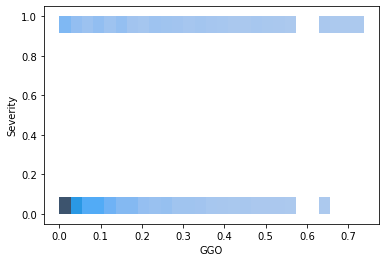

In [54]:
# GGO vs Severity plot
sns.histplot(df, x="GGO", y='Severity',kde=True)

<AxesSubplot:xlabel='Consolidation', ylabel='Severity'>

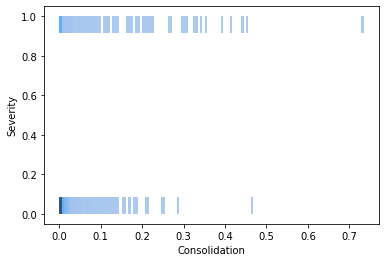

In [55]:
# Consolidation vs Severity plot
sns.histplot(df, x="Consolidation", y='Severity',kde=True)

<AxesSubplot:xlabel='Sex', ylabel='Severity'>

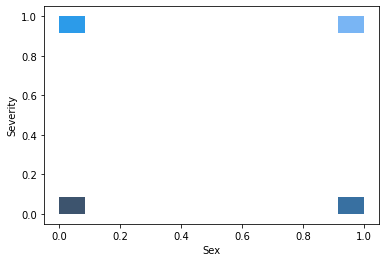

In [56]:
# Sex vs Severity plot
sns.histplot(df, x="Sex", y='Severity',kde=True)

### Question 1.2: What can you say about the relations of `Consolidation`, `GGO` and `Sex` with the `Severity` of COVID?

Answer to Question 1.2: ...


***
## Part 2:  Logistic regression of severity on `Age` and `Gender`

Logistic regression allows us to analyze how a set of features affects some binary target label. The weights gives us an estimation of the influence of each particular feature on the probability of the target being equal to one.

We want to model how the probability that a person develops a severe COVID disease is affected by his/her age, sex, and size lung lesions.

Let $y_i = 1$ if i-th person's develop severe symptoms. 
Logistic regression models this probabilty in the following way:

\begin{equation}
p(y_i = 1 \mid \beta) = \sigma (\alpha + \beta_0 age_i + \beta_1 sex_i + \dots ),
\end{equation}

where $\sigma(t) = \frac1{1 + e^{-t}}$

We can obtain a point estimate for the intercept $\alpha$ and coefficients $\beta_k$ using *sklearn* package.


### Task 2.1: Define the logistic function

To compute probabilities with the logistic regresion, we first need to define the logistic functions. Use `numpy` and complete the code function below so it returns the logistic function $\sigma(t) = \frac1{1 + e^{-t}}$. 

Test your system. The `logistic(1)` should return a value of `+- 0.731`.

In [73]:
import math
def logistic(x):
    val = 1 / (1 + math.exp(-x))
    return float(format(val,".3f"))
logistic(1) # Check

0.731

Now lets fit a logistic regression model for COVID severity. The code below fits a logistic regression model for severity using only the `Age` and `Sex` features.

In [74]:
from sklearn.linear_model import LogisticRegression

X = np.vstack([df.Age, df.Sex]).T
y = df.Severity.values
lr = LogisticRegression(penalty='none')
res = lr.fit(X, y)

print('Coefficients:')
print(res.coef_)
print('')
print('Intercept:')
print(res.intercept_)

Coefficients:
[[ 0.03394394 -0.60484405]]

Intercept:
[-3.11923431]



#### Confidence intervals

The classical confidence intervals can be obtained using bootstrapping.
We estimate the parameter for many random samples of the population and obtain an approximation of the sampling distribution of the coefficient estimate.

This method is very general, as it is independent of the estimator and makes fewer assumptions than other methods.


In [75]:
# Estimte confidence intervals with bootstrapping
lr = LogisticRegression(penalty='none')
N_bs = 1000
# defining empty 2D coeficients and 1d intercepts. the coeficient are 2D as 
# we fit the model on both the age and sex features
coef_bs = np.zeros([2,N_bs])
int_bs = np.zeros([1,N_bs])

# fitting 1000 models trained on a different random subset of the data 
#and storing there linear coeficients and intercept values
for i in range(N_bs):
    # creating a random set of input features 
    df_bs = df.loc[np.random.choice(df.index, df.shape[0])]
    # creating feature vectores simular to previous example. Binarizing by string comparison 
    X = np.vstack([df_bs.Age, df_bs.Sex]).T
    y = df_bs.Severity.values
    res_bs = lr.fit(X, y)
    coef_bs[:,i] = res_bs.coef_
    int_bs[:,i] = res_bs.intercept_


***
#### Visualization and analysis of results

The following figure illustrates the model predictions: mean and confidence intervals. In this population the risk of severity increases with age and is larger for males. The risk for a new subject from a similar population can be computed using the previous equation for $p(y_i = 1 \mid \beta)$.

Given the number of parameters (3 in this case), and the number of observations (1205), there is no risk of model overfitting.

TypeError: only size-1 arrays can be converted to Python scalars

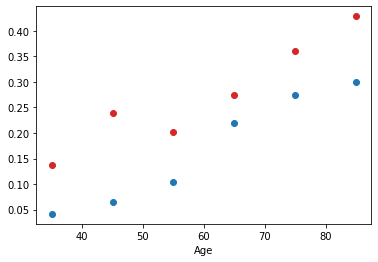

In [92]:

df[df.Sex==0].groupby(['Age']).Severity.apply(lambda x: np.mean(x)).plot(marker='o', color='Tab:red', linestyle='')
df[df.Sex==1].groupby(['Age']).Severity.apply(lambda x: np.mean(x)).plot(marker='o', color='Tab:blue', linestyle='')

age = np.linspace(20, 100, 100)

# plotting for females, The second value of all X features should be 0. We use the age feature and multiply by 0 as it 
# already has the right shape 
X = np.vstack([age, age*0])
# computing the confidence 2.5 and 97.5 confidence intervals for severity for female datapoints
CI = np.percentile(logistic(int_bs.T + coef_bs.T @ X), [2.5, 97.5], axis=0)
plt.plot(age, logistic(res.intercept_ + res.coef_ @ X).T, color='Tab:red', lw=1)
plt.fill_between(age, CI[0], CI[1], color='Tab:red', alpha=0.1)

plt.legend(['Proportion of severe cases (among females)', 'Proportion of severe cases (among males)', 'Model prediction', '95% CI'], loc=6)

# plotting for females, The second value of all X features should be 0. We use the age feature and multiply by 0 + 1  as it 
# already has the right shape 
X = np.vstack([age, age*0 + 1])
CI = np.percentile(logistic(int_bs.T + coef_bs.T @ X), [2.5, 97.5], axis=0)
plt.plot(age, logistic(res.intercept_ + res.coef_ @ X).T, color='Tab:blue', lw=1)
plt.fill_between(age, CI[0], CI[1], color='Tab:blue', alpha=0.1)

# plotting density of age for 0 and 1 severity. 


plt.ylabel('Severity')
plt.xlabel('Age')

plt.axis([25,95, -0.1, 1.1]);

### Question 2.2: What can you conclude from this graph. What does it mean that the confidence intervals don't overlap? 


Answer to question 2.2: ...


***
## Part 3: Add `GGO` and `Consolidation`  

The previous model only explored the gender and age effect. In this part, we are going to add the `GGO` and `Consolidation` to the model. 

### Task 3.1.

Similar to the code provided in Part 2, retrain the model on all 4 features. Print the coefficients and intercept.

In [ ]:
# Your code here


### Question 3.1: The shape of the coefficient vector has changed, what do the values represent? Based on these values, what feature do you expect to have the highest impact on disease severity?

Answer to question 3.1: ...


### Task 3.2: Use the bootstrapping technique to create the confidence interval for the new model

In [ ]:
# Your code here

### Task 3.3: Visualize the results of `Consolidation` and `GGO`: 
As we now have multi-dimensional and continous data, we have to apply some tricks to plot the results.

Firstly, to reduce the dimensionality, we will only focus on males. 
Secondly, as logistic regression model is a linear model, we can simply average out features. 

Furthermore, `Consolidation` and `GGO` are continous values. To assess their full impact, we will use the 10th and 90th percentiles. This reflects a high or low value of `Consolidation` and `GGO`.

__Hint 1:__ Create `X` such that you only have males.

__Hint 2:__ Set the `GGO` value to its mean in `X` when inspecting the impact of consolidation and vice versa.

__Hint 3:__ To create 2 plots, use the 10th and 90th percentile values in `X` for the feature of interest. 

__Hint 4:__ You do not need to have the pointplots here as we do not have cathegorical data for the `GGO` and` Consolidation`.


In [ ]:
# Code for impact of GGO 


In [ ]:
# Code for impact of Consolidation 


### Question 3.2: What can you say on the impact on severity from `GGO` and `Consolidation`? Which one has the highest impact ? 

Answer to Question 3.2: ...


### Question 3.3: Does this insight agrees with your answer to Q3.1? Why could this happen? 
__Hint:__ Have a look at the density plots you made in Part 1.

Answer to Question 3.3: ...

## Part 4: Comparison with a random forrest classifier

Now we are going to change the code of Task 2.1 to work with a random forest clasffier. Random forrest classifiers are more complex models with more degrees of freedom compared to the logistic regression. 

The code below performs the same regression with a random forrest classifier. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = np.vstack([df.Age, df.Sex]).T
y = df.Severity.values

clf = RandomForestClassifier(n_estimators=100, max_depth=None,
    min_samples_split=100, random_state=0)

classifier = clf.fit(X,y)

In [ ]:
df[df.Sex==0].groupby(['Age']).Severity.apply(lambda x: np.mean(x)).plot(marker='o', color='Tab:red', linestyle='')
df[df.Sex==1].groupby(['Age']).Severity.apply(lambda x: np.mean(x)).plot(marker='o', color='Tab:blue', linestyle='')
age = np.linspace(20, 100, 100)
X = np.vstack([age, age*0])
predictions = classifier.predict_proba(X.T)
plt.plot(age, predictions[:,1], color='Tab:red', lw=1)
age = np.linspace(20, 100, 100)
X = np.vstack([age, age*0+1])
predictions = classifier.predict_proba(X.T)
plt.plot(age, predictions[:,1], color='Tab:blue', lw=1)
plt.ylabel('Severity')
plt.xlabel('Age')
plt.axis([25,95, -0.1*h, 1.1*h]);

### Question 4.1:  How does this model compares to the bootstrapped logistic model in Part 2?

Answer to Question 4.1: ...

### Optional task 4.2 : Try adding confidence intervals with bootstrapping techniques for the Random Forest model. 

In [ ]:
# Your code here